   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Eli

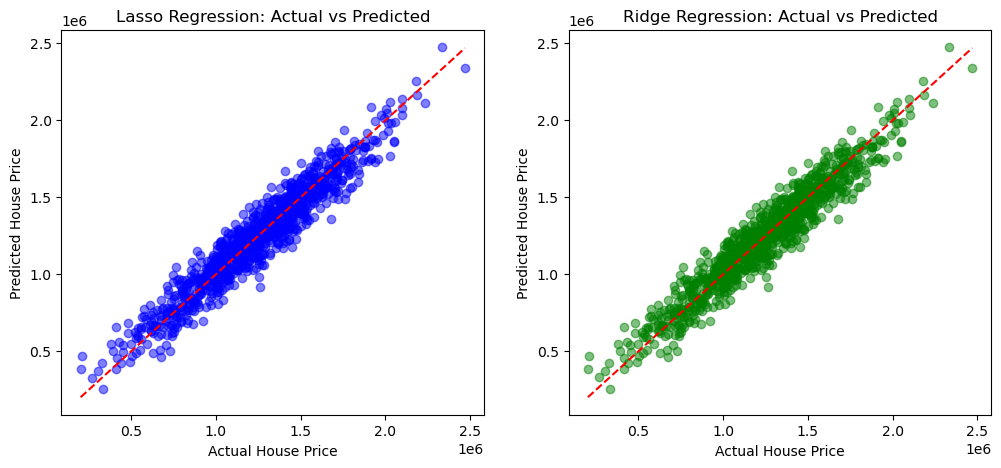

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('housing_price_dataset.csv')

# Display first few rows
print(df.head())

# Check for non-numeric columns
print(df.dtypes)

# Drop columns that are clearly non-numeric (e.g., Address, Street Name)
df = df.drop(columns=['Address'], errors='ignore')  # Ignore if column doesn't exist

# Handle missing values (drop or impute)
df = df.dropna()

# Convert categorical variables into numerical using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Ensure target variable is numeric
df.iloc[:, -1] = pd.to_numeric(df.iloc[:, -1], errors='coerce')

# Drop any remaining NaN values (if any exist after conversion)
df = df.dropna()

# Select features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except last (assuming last column is 'Price')
y = df.iloc[:, -1]   # Last column (house price)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning
param_grid = {'alpha': np.logspace(-3, 3, 7)}

# Lasso Regression (L1)
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

# Ridge Regression (L2)
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

# Predictions
y_pred_lasso = best_lasso.predict(X_test)
y_pred_ridge = best_ridge.predict(X_test)

# Performance Metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Lasso Regression - Best Alpha: {lasso_grid.best_params_['alpha']}")
print(f"Lasso Regression - R² Score: {r2_lasso:.4f}, MSE: {mse_lasso:.4f}")

print(f"Ridge Regression - Best Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}, MSE: {mse_ridge:.4f}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Lasso Regression: Actual vs Predicted")

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Ridge Regression: Actual vs Predicted")

plt.show()
